# CNN_V3

In [1]:
import numpy as np
import h5py
import torch
import matplotlib.pyplot as plt
import glob
import torchvision.transforms
import random
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F


%load_ext autoreload
%autoreload 2
from useful.CNN_V3 import *
from useful.utils import *

C:\Users\wang5\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
train_loader, test_loader, val_loader = loader()(path='./project_datasets/A01T_slice.mat',
                                             batch_size= 30,
                                             num_test =50, 
                                             num_validation =38)
print('-'*20)
for batch_idx, (data, target) in enumerate(train_loader):
    print('data size:',data.shape)
    # check nan in data
    print("The nan still exist:",np.isnan(data.numpy().sum()))
    break

X_shape (288, 22, 1000)
y_shape (1, 1000)
nan exists on row 56,and be deleted
Train data shape:  (199, 22, 1000)
Train labels shape:  (199,)
test data shape:  (50, 22, 1000)
test labels shape:  (50,)
Validation data shape:  (38, 22, 1000)
Validation labels shape:  (38,)
--------------------
data size: torch.Size([30, 1, 22, 1000])
The nan still exist: False


In [3]:
criteria = F.cross_entropy

def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target).long()
        optimizer.zero_grad()
        output = model(data)
        loss = criteria(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 5 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.data[0]))
    

def test(test_loader=test_loader, mode = 'val'):
    # train mode to get the train accuracy 
    # val mode to get the validation accuracy
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(target).long()
        output = model(data)
        test_loss += criteria(output, target, size_average=False).data[0] # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).long().cpu().sum()

    test_loss /= len(test_loader.dataset)
    if mode == 'train':
        print('train loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)'.format(
            test_loss, correct, len(test_loader.dataset),
            100. * correct / len(test_loader.dataset)))
        

    else:
        print('validation loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
            test_loss, correct, len(test_loader.dataset),
            100. * correct / len(test_loader.dataset)))
    
    return [test_loss,correct / len(test_loader.dataset)]

In [4]:
def main_train(epoches = 8):
    stats = {}
    stats['train'] = []
    stats['val']  = []

    epoches = range(epoches)
    for epoch in epoches:
        train(epoch)
        stats['train'].append(test(train_loader, mode='train'))
        stats['val'].append(test(val_loader, mode='val'))

    print('Test set result:')
    test(test_loader, mode = 'val')

    stats['val']  = np.array(stats['val'])
    stats['train'] = np.array(stats['train'])

    fig, ax = plt.subplots(1, 2,figsize = (8,4))
    ax[0].plot(epoches,stats['val'][:,0],epoches,stats['train'][:,0])

    ax[0].legend(['validation','train'])
    ax[0].set_title('loss')

    ax[1].plot(epoches,stats['val'][:,1],epoches,stats['train'][:,1])

    ax[1].legend(['validation','train'])
    ax[1].set_title('accuracy')

# CNN_V3

In [6]:
from torch import autograd
input = autograd.Variable(torch.randn(15, 1, 22, 1000)) # N, C, H, W
print(input.size())

m = nn.Conv2d(1, 25, kernel_size=(1, 10), stride=1, padding=0) # in_channels out_channels
output = m(input)
print(output.size())

m = nn.Conv2d(25, 25, kernel_size=(2, 5), stride=1, padding=0)
output = m(output)
print(output.size())

m = nn.Conv2d(25, 25, kernel_size=(5, 2), stride=1, padding=0)
output = m(output)
print(output.size()) 


m = nn.Conv2d(25, 25, kernel_size=(17, 1), stride=1, padding=0) # in_channels out_channels
output = m(output)
print(output.size())

output = output.permute(0, 2, 1, 3)
print(output.size())

m = nn.MaxPool2d(kernel_size=(1, 3), stride=(1, 3))
output = m(output)
print(output.size())

m = nn.Conv2d(1, 50, kernel_size=(25, 10), stride=1, padding=0)
output = m(output)
print(output.size())

m = nn.BatchNorm2d(num_features=50, eps=1e-05, momentum=0.1, affine=True)
output = m(output)
print(output.size())

output = output.permute(0, 2, 1, 3)
print(output.size())

m = nn.MaxPool2d(kernel_size=(1, 3), stride=(1, 3))
output = m(output)
print(output.size())

m = nn.Conv2d(1, 100, kernel_size=(50, 10), stride=1, padding=0)
output = m(output)
print(output.size())
    
m = nn.BatchNorm2d(num_features=100, eps=1e-05, momentum=0.1, affine=True)
output = m(output)
print(output.size())

output = output.permute(0, 2, 1, 3)
print(output.size())

m = nn.MaxPool2d(kernel_size=(1, 3), stride=(1, 3))
output = m(output)
print(output.size())

m = nn.Conv2d(1, 200, kernel_size=(100, 10), stride=1, padding=0)
output = m(output)
print(output.size())

m = nn.BatchNorm2d(num_features=200, eps=1e-05, momentum=0.1, affine=True)
output = m(output)
print(output.size())

output = output.permute(0, 2, 1, 3)
print(output.size())

m = nn.MaxPool2d(kernel_size=(1, 3), stride=(1, 3))
output = m(output)
print(output.size())

torch.Size([15, 1, 22, 1000])
torch.Size([15, 25, 22, 991])
torch.Size([15, 25, 21, 987])
torch.Size([15, 25, 17, 986])
torch.Size([15, 25, 1, 986])
torch.Size([15, 1, 25, 986])
torch.Size([15, 1, 25, 328])
torch.Size([15, 50, 1, 319])
torch.Size([15, 50, 1, 319])
torch.Size([15, 1, 50, 319])
torch.Size([15, 1, 50, 106])
torch.Size([15, 100, 1, 97])
torch.Size([15, 100, 1, 97])
torch.Size([15, 1, 100, 97])
torch.Size([15, 1, 100, 32])
torch.Size([15, 200, 1, 23])
torch.Size([15, 200, 1, 23])
torch.Size([15, 1, 200, 23])
torch.Size([15, 1, 200, 7])


# Train on each individual subject, test on the same subject

X_shape (288, 22, 1000)
y_shape (1, 1000)
nan exists on row 56,and be deleted
Train data shape:  (199, 22, 1000)
Train labels shape:  (199,)
test data shape:  (50, 22, 1000)
test labels shape:  (50,)
Validation data shape:  (38, 22, 1000)
Validation labels shape:  (38,)
--------------------
data size: torch.Size([30, 1, 22, 1000])
The nan still exist: False
Train Epoch: 0 [0/199 (0%)]	Loss: 1.391593
Train Epoch: 0 [150/199 (71%)]	Loss: 1.358175
train loss: 1.7579, Accuracy: 50/199 (25%)
validation loss: 1.7720, Accuracy: 9/38 (24%)

Train Epoch: 1 [0/199 (0%)]	Loss: 0.974291
Train Epoch: 1 [150/199 (71%)]	Loss: 0.740452
train loss: 3.4978, Accuracy: 50/199 (25%)
validation loss: 3.6574, Accuracy: 9/38 (24%)

Train Epoch: 2 [0/199 (0%)]	Loss: 0.525533
Train Epoch: 2 [150/199 (71%)]	Loss: 0.464117
train loss: 0.7507, Accuracy: 149/199 (75%)
validation loss: 1.2070, Accuracy: 15/38 (39%)

Train Epoch: 3 [0/199 (0%)]	Loss: 0.311979
Train Epoch: 3 [150/199 (71%)]	Loss: 0.226594
train loss: 

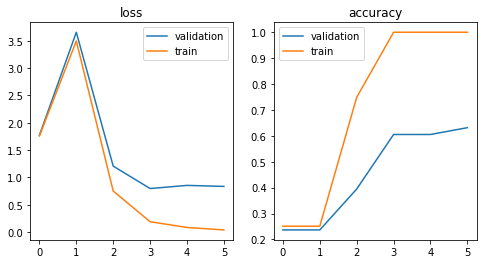

In [19]:
path = './project_datasets/A01T_slice.mat'
train_loader, test_loader, val_loader = loader()(path=path,
                                             batch_size= 30,
                                             num_test =50, 
                                             num_validation =38)
print('-'*20)
for batch_idx, (data, target) in enumerate(train_loader):
    print('data size:',data.shape)
    # check nan in data
    print("The nan still exist:",np.isnan(data.numpy().sum()))
    break
model = CNN_V3()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 6)

X_shape (288, 22, 1000)
y_shape (1, 1000)
nan exists on row 237,and be deleted
nan exists on row 284,and be deleted
Train data shape:  (198, 22, 1000)
Train labels shape:  (198,)
test data shape:  (50, 22, 1000)
test labels shape:  (50,)
Validation data shape:  (38, 22, 1000)
Validation labels shape:  (38,)
--------------------
data size: torch.Size([30, 1, 22, 1000])
The nan still exist: False
Train Epoch: 0 [0/198 (0%)]	Loss: 1.395905
Train Epoch: 0 [150/198 (71%)]	Loss: 1.373326
train loss: 1.4008, Accuracy: 50/198 (25%)
validation loss: 1.3952, Accuracy: 10/38 (26%)

Train Epoch: 1 [0/198 (0%)]	Loss: 0.703110
Train Epoch: 1 [150/198 (71%)]	Loss: 0.768789
train loss: 1.2559, Accuracy: 97/198 (49%)
validation loss: 1.3812, Accuracy: 13/38 (34%)

Train Epoch: 2 [0/198 (0%)]	Loss: 0.380943
Train Epoch: 2 [150/198 (71%)]	Loss: 0.293447
train loss: 0.6892, Accuracy: 169/198 (85%)
validation loss: 1.3596, Accuracy: 12/38 (32%)

Train Epoch: 3 [0/198 (0%)]	Loss: 0.145068
Train Epoch: 3 [15

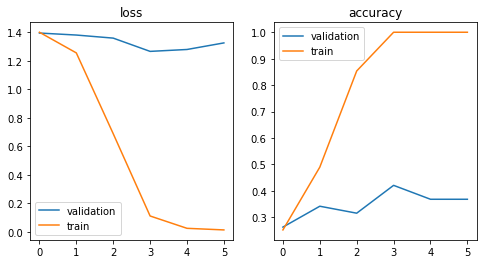

In [20]:
path = './project_datasets/A02T_slice.mat'
train_loader, test_loader, val_loader = loader()(path=path,
                                             batch_size= 30,
                                             num_test =50, 
                                             num_validation =38)
print('-'*20)
for batch_idx, (data, target) in enumerate(train_loader):
    print('data size:',data.shape)
    # check nan in data
    print("The nan still exist:",np.isnan(data.numpy().sum()))
    break
model = CNN_V3()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 6)

X_shape (288, 22, 1000)
y_shape (1, 1000)
nan exists on row 113,and be deleted
nan exists on row 249,and be deleted
Train data shape:  (198, 22, 1000)
Train labels shape:  (198,)
test data shape:  (50, 22, 1000)
test labels shape:  (50,)
Validation data shape:  (38, 22, 1000)
Validation labels shape:  (38,)
--------------------
data size: torch.Size([30, 1, 22, 1000])
The nan still exist: False
Train Epoch: 0 [0/198 (0%)]	Loss: 1.363917
Train Epoch: 0 [150/198 (71%)]	Loss: 1.343358
train loss: 1.7398, Accuracy: 49/198 (25%)
validation loss: 1.7061, Accuracy: 10/38 (26%)

Train Epoch: 1 [0/198 (0%)]	Loss: 1.036307
Train Epoch: 1 [150/198 (71%)]	Loss: 0.980025
train loss: 1.5906, Accuracy: 57/198 (29%)
validation loss: 1.7872, Accuracy: 9/38 (24%)

Train Epoch: 2 [0/198 (0%)]	Loss: 0.661916
Train Epoch: 2 [150/198 (71%)]	Loss: 0.439242
train loss: 0.5260, Accuracy: 189/198 (95%)
validation loss: 1.1853, Accuracy: 20/38 (53%)

Train Epoch: 3 [0/198 (0%)]	Loss: 0.329830
Train Epoch: 3 [150

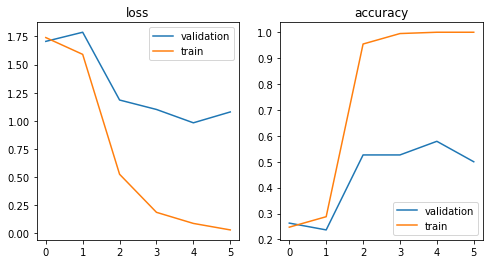

In [9]:
path = './project_datasets/A03T_slice.mat'
train_loader, test_loader, val_loader = loader()(path=path,
                                             batch_size= 30,
                                             num_test =50, 
                                             num_validation =38)
print('-'*20)
for batch_idx, (data, target) in enumerate(train_loader):
    print('data size:',data.shape)
    # check nan in data
    print("The nan still exist:",np.isnan(data.numpy().sum()))
    break
model = CNN_V3()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 6)

X_shape (288, 22, 1000)
y_shape (1, 1000)
nan exists on row 144,and be deleted
nan exists on row 145,and be deleted
nan exists on row 146,and be deleted
nan exists on row 179,and be deleted
Train data shape:  (196, 22, 1000)
Train labels shape:  (196,)
test data shape:  (50, 22, 1000)
test labels shape:  (50,)
Validation data shape:  (38, 22, 1000)
Validation labels shape:  (38,)
--------------------
data size: torch.Size([30, 1, 22, 1000])
The nan still exist: False
Train Epoch: 0 [0/196 (0%)]	Loss: 1.444397
Train Epoch: 0 [150/196 (71%)]	Loss: 1.310026
train loss: 1.4994, Accuracy: 49/196 (25%)
validation loss: 1.4975, Accuracy: 10/38 (26%)

Train Epoch: 1 [0/196 (0%)]	Loss: 0.937359
Train Epoch: 1 [150/196 (71%)]	Loss: 0.748390
train loss: 2.2333, Accuracy: 49/196 (25%)
validation loss: 2.3627, Accuracy: 10/38 (26%)

Train Epoch: 2 [0/196 (0%)]	Loss: 0.611643
Train Epoch: 2 [150/196 (71%)]	Loss: 0.346460
train loss: 1.0247, Accuracy: 73/196 (37%)
validation loss: 1.7780, Accuracy: 1

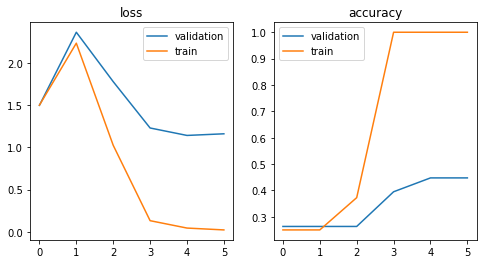

In [27]:
path = './project_datasets/A04T_slice.mat'
train_loader, test_loader, val_loader = loader()(path=path,
                                             batch_size= 30,
                                             num_test =50, 
                                             num_validation =38)
print('-'*20)
for batch_idx, (data, target) in enumerate(train_loader):
    print('data size:',data.shape)
    # check nan in data
    print("The nan still exist:",np.isnan(data.numpy().sum()))
    break
model = CNN_V3()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 6)

X_shape (288, 22, 1000)
y_shape (1, 1000)
nan exists on row 6,and be deleted
nan exists on row 28,and be deleted
nan exists on row 57,and be deleted
nan exists on row 101,and be deleted
nan exists on row 220,and be deleted
nan exists on row 225,and be deleted
Train data shape:  (194, 22, 1000)
Train labels shape:  (194,)
test data shape:  (50, 22, 1000)
test labels shape:  (50,)
Validation data shape:  (38, 22, 1000)
Validation labels shape:  (38,)
--------------------
data size: torch.Size([30, 1, 22, 1000])
The nan still exist: False
Train Epoch: 0 [0/194 (0%)]	Loss: 1.451146
Train Epoch: 0 [150/194 (71%)]	Loss: 1.518553
train loss: 1.3972, Accuracy: 49/194 (25%)
validation loss: 1.3915, Accuracy: 10/38 (26%)

Train Epoch: 1 [0/194 (0%)]	Loss: 0.820506
Train Epoch: 1 [150/194 (71%)]	Loss: 0.714720
train loss: 1.1635, Accuracy: 89/194 (46%)
validation loss: 1.2998, Accuracy: 14/38 (37%)

Train Epoch: 2 [0/194 (0%)]	Loss: 0.370082
Train Epoch: 2 [150/194 (71%)]	Loss: 0.538667
train los

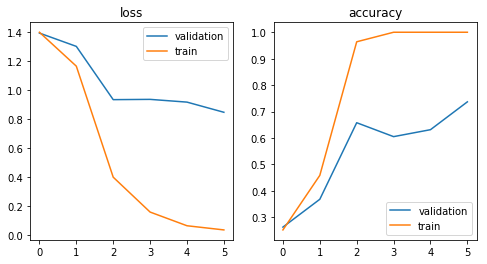

In [22]:
path = './project_datasets/A05T_slice.mat'
train_loader, test_loader, val_loader = loader()(path=path,
                                             batch_size= 30,
                                             num_test =50, 
                                             num_validation =38)
print('-'*20)
for batch_idx, (data, target) in enumerate(train_loader):
    print('data size:',data.shape)
    # check nan in data
    print("The nan still exist:",np.isnan(data.numpy().sum()))
    break
model = CNN_V3()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 6)

X_shape (288, 22, 1000)
y_shape (1, 1000)
nan exists on row 97,and be deleted
nan exists on row 115,and be deleted
nan exists on row 140,and be deleted
Train data shape:  (197, 22, 1000)
Train labels shape:  (197,)
test data shape:  (50, 22, 1000)
test labels shape:  (50,)
Validation data shape:  (38, 22, 1000)
Validation labels shape:  (38,)
--------------------
data size: torch.Size([30, 1, 22, 1000])
The nan still exist: False
Train Epoch: 0 [0/197 (0%)]	Loss: 1.394253
Train Epoch: 0 [150/197 (71%)]	Loss: 1.380563
train loss: 1.3861, Accuracy: 49/197 (25%)
validation loss: 1.3871, Accuracy: 9/38 (24%)

Train Epoch: 1 [0/197 (0%)]	Loss: 1.341360
Train Epoch: 1 [150/197 (71%)]	Loss: 1.354058
train loss: 1.3649, Accuracy: 53/197 (27%)
validation loss: 1.3807, Accuracy: 8/38 (21%)

Train Epoch: 2 [0/197 (0%)]	Loss: 1.288988
Train Epoch: 2 [150/197 (71%)]	Loss: 1.274875
train loss: 1.2762, Accuracy: 115/197 (58%)
validation loss: 1.3548, Accuracy: 9/38 (24%)

Train Epoch: 3 [0/197 (0%)]	

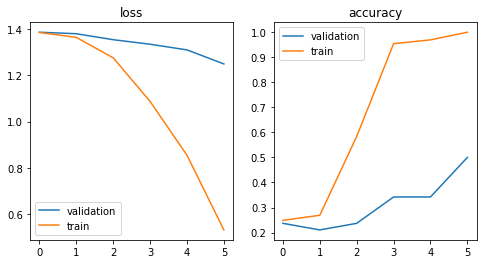

In [12]:
path = './project_datasets/A06T_slice.mat'
train_loader, test_loader, val_loader = loader()(path=path,
                                             batch_size= 30,
                                             num_test =50, 
                                             num_validation =38)
print('-'*20)
for batch_idx, (data, target) in enumerate(train_loader):
    print('data size:',data.shape)
    # check nan in data
    print("The nan still exist:",np.isnan(data.numpy().sum()))
    break
model = CNN_V3()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 6)

X_shape (288, 22, 1000)
y_shape (1, 1000)
Train data shape:  (200, 22, 1000)
Train labels shape:  (200,)
test data shape:  (50, 22, 1000)
test labels shape:  (50,)
Validation data shape:  (38, 22, 1000)
Validation labels shape:  (38,)
--------------------
data size: torch.Size([30, 1, 22, 1000])
The nan still exist: False
Train Epoch: 0 [0/200 (0%)]	Loss: 1.445338
Train Epoch: 0 [150/200 (71%)]	Loss: 1.106469
train loss: 1.4762, Accuracy: 50/200 (25%)
validation loss: 1.4815, Accuracy: 10/38 (26%)

Train Epoch: 1 [0/200 (0%)]	Loss: 0.815273
Train Epoch: 1 [150/200 (71%)]	Loss: 0.636405
train loss: 1.9581, Accuracy: 50/200 (25%)
validation loss: 2.0172, Accuracy: 9/38 (24%)

Train Epoch: 2 [0/200 (0%)]	Loss: 0.341703
Train Epoch: 2 [150/200 (71%)]	Loss: 0.327835
train loss: 1.8997, Accuracy: 97/200 (48%)
validation loss: 2.2305, Accuracy: 13/38 (34%)

Train Epoch: 3 [0/200 (0%)]	Loss: 0.177217
Train Epoch: 3 [150/200 (71%)]	Loss: 0.122403
train loss: 0.6352, Accuracy: 155/200 (78%)
vali

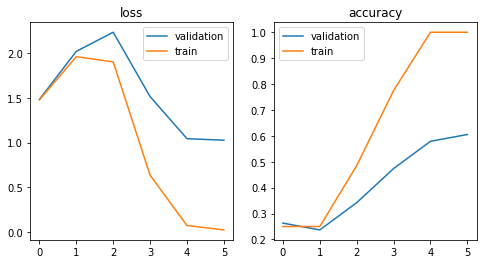

In [13]:
path = './project_datasets/A07T_slice.mat'
train_loader, test_loader, val_loader = loader()(path=path,
                                             batch_size= 30,
                                             num_test =50, 
                                             num_validation =38)
print('-'*20)
for batch_idx, (data, target) in enumerate(train_loader):
    print('data size:',data.shape)
    # check nan in data
    print("The nan still exist:",np.isnan(data.numpy().sum()))
    break
model = CNN_V3()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 6)

X_shape (288, 22, 1000)
y_shape (1, 1000)
nan exists on row 58,and be deleted
nan exists on row 81,and be deleted
nan exists on row 124,and be deleted
nan exists on row 151,and be deleted
nan exists on row 178,and be deleted
nan exists on row 275,and be deleted
Train data shape:  (194, 22, 1000)
Train labels shape:  (194,)
test data shape:  (50, 22, 1000)
test labels shape:  (50,)
Validation data shape:  (38, 22, 1000)
Validation labels shape:  (38,)
--------------------
data size: torch.Size([30, 1, 22, 1000])
The nan still exist: False
Train Epoch: 0 [0/194 (0%)]	Loss: 1.585621
Train Epoch: 0 [150/194 (71%)]	Loss: 1.717449
train loss: 1.6696, Accuracy: 49/194 (25%)
validation loss: 1.6329, Accuracy: 10/38 (26%)

Train Epoch: 1 [0/194 (0%)]	Loss: 0.647135
Train Epoch: 1 [150/194 (71%)]	Loss: 0.532127
train loss: 1.9989, Accuracy: 98/194 (51%)
validation loss: 2.1828, Accuracy: 16/38 (42%)

Train Epoch: 2 [0/194 (0%)]	Loss: 0.252764
Train Epoch: 2 [150/194 (71%)]	Loss: 0.210680
train l

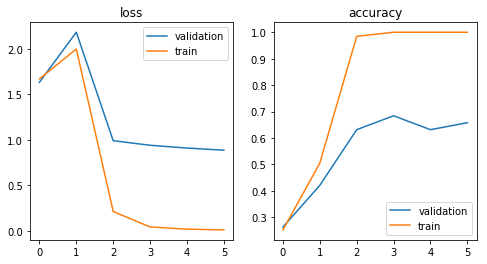

In [24]:
path = './project_datasets/A08T_slice.mat'
train_loader, test_loader, val_loader = loader()(path=path,
                                             batch_size= 30,
                                             num_test =50, 
                                             num_validation =38)
print('-'*20)
for batch_idx, (data, target) in enumerate(train_loader):
    print('data size:',data.shape)
    # check nan in data
    print("The nan still exist:",np.isnan(data.numpy().sum()))
    break
model = CNN_V3()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 6)

X_shape (288, 22, 1000)
y_shape (1, 1000)
nan exists on row 22,and be deleted
nan exists on row 61,and be deleted
nan exists on row 92,and be deleted
nan exists on row 93,and be deleted
nan exists on row 159,and be deleted
nan exists on row 202,and be deleted
nan exists on row 204,and be deleted
nan exists on row 218,and be deleted
nan exists on row 239,and be deleted
nan exists on row 250,and be deleted
Train data shape:  (190, 22, 1000)
Train labels shape:  (190,)
test data shape:  (50, 22, 1000)
test labels shape:  (50,)
Validation data shape:  (38, 22, 1000)
Validation labels shape:  (38,)
--------------------
data size: torch.Size([30, 1, 22, 1000])
The nan still exist: False
Train Epoch: 0 [0/190 (0%)]	Loss: 1.388534
Train Epoch: 0 [150/190 (71%)]	Loss: 1.186091
train loss: 1.5243, Accuracy: 47/190 (25%)
validation loss: 1.5092, Accuracy: 10/38 (26%)

Train Epoch: 1 [0/190 (0%)]	Loss: 0.975283
Train Epoch: 1 [150/190 (71%)]	Loss: 0.774635
train loss: 2.5374, Accuracy: 47/190 (25%

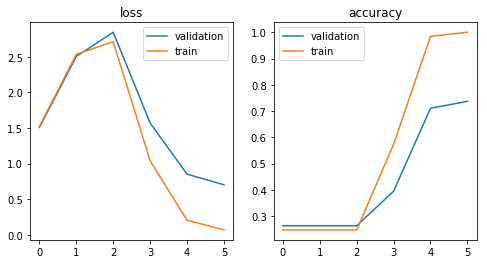

In [26]:
path = './project_datasets/A09T_slice.mat'
train_loader, test_loader, val_loader = loader()(path=path,
                                             batch_size= 30,
                                             num_test =50, 
                                             num_validation =38)
print('-'*20)
for batch_idx, (data, target) in enumerate(train_loader):
    print('data size:',data.shape)
    # check nan in data
    print("The nan still exist:",np.isnan(data.numpy().sum()))
    break
model = CNN_V3()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 6)

# Train on all subjects, test on all subjects and each individual subject

nan exists on row 56,and be deleted
(287, 22, 1000)
nan exists on row 237,and be deleted
nan exists on row 284,and be deleted
(286, 22, 1000)
nan exists on row 113,and be deleted
nan exists on row 249,and be deleted
(286, 22, 1000)
nan exists on row 144,and be deleted
nan exists on row 145,and be deleted
nan exists on row 146,and be deleted
nan exists on row 179,and be deleted
(284, 22, 1000)
nan exists on row 6,and be deleted
nan exists on row 28,and be deleted
nan exists on row 57,and be deleted
nan exists on row 101,and be deleted
nan exists on row 220,and be deleted
nan exists on row 225,and be deleted
(282, 22, 1000)
nan exists on row 97,and be deleted
nan exists on row 115,and be deleted
nan exists on row 140,and be deleted
(285, 22, 1000)
(288, 22, 1000)
nan exists on row 58,and be deleted
nan exists on row 81,and be deleted
nan exists on row 124,and be deleted
nan exists on row 151,and be deleted
nan exists on row 178,and be deleted
nan exists on row 275,and be deleted
(282, 22

Train Epoch: 9 [450/1838 (24%)]	Loss: 0.012771
Train Epoch: 9 [600/1838 (32%)]	Loss: 0.006587
Train Epoch: 9 [750/1838 (40%)]	Loss: 0.007916
Train Epoch: 9 [900/1838 (48%)]	Loss: 0.003553
Train Epoch: 9 [1050/1838 (56%)]	Loss: 0.007596
Train Epoch: 9 [1200/1838 (65%)]	Loss: 0.007590
Train Epoch: 9 [1350/1838 (73%)]	Loss: 0.003514
Train Epoch: 9 [1500/1838 (81%)]	Loss: 0.008025
Train Epoch: 9 [1650/1838 (89%)]	Loss: 0.009098
Train Epoch: 9 [1800/1838 (97%)]	Loss: 0.005453
train loss: 0.0041, Accuracy: 1838/1838 (100%)
validation loss: 1.1832, Accuracy: 169/270 (63%)

Test set result:
validation loss: 1.2814, Accuracy: 266/450 (59%)

This is test set result for subject1:
validation loss: 1.2731, Accuracy: 32/50 (64%)

This is test set result for subject2:
validation loss: 1.6089, Accuracy: 22/50 (44%)

This is test set result for subject3:
validation loss: 0.7625, Accuracy: 32/50 (64%)

This is test set result for subject4:
validation loss: 1.3889, Accuracy: 24/50 (48%)

This is test set

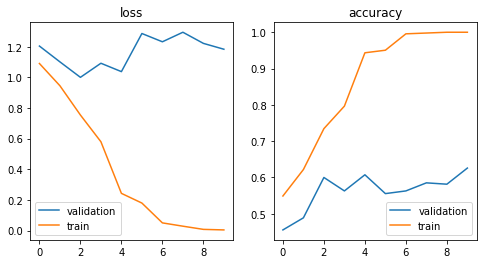

In [18]:
l = loader()
l.batch_size = 30
l.getAllDataSubject(num_test = 50,num_validation = 30)
train_loader = l.train_loader
test_loader = l.test_loader
val_loader = l.val_loader
print('-'*20)
for batch_idx, (data, target) in enumerate(train_loader):
    print('data size:',data.shape)
    # check nan in data
    print("The nan still exist:",np.isnan(data.numpy().sum()))
    break
model = CNN_V3()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 10)
for i in range(9):
    print('This is test set result for subject{}:'.format(i+1))
    test(l.test_loaders[i], mode = 'val')

nan exists on row 56,and be deleted
(287, 22, 1000)
nan exists on row 237,and be deleted
nan exists on row 284,and be deleted
(286, 22, 1000)
nan exists on row 113,and be deleted
nan exists on row 249,and be deleted
(286, 22, 1000)
nan exists on row 144,and be deleted
nan exists on row 145,and be deleted
nan exists on row 146,and be deleted
nan exists on row 179,and be deleted
(284, 22, 1000)
nan exists on row 6,and be deleted
nan exists on row 28,and be deleted
nan exists on row 57,and be deleted
nan exists on row 101,and be deleted
nan exists on row 220,and be deleted
nan exists on row 225,and be deleted
(282, 22, 1000)
nan exists on row 97,and be deleted
nan exists on row 115,and be deleted
nan exists on row 140,and be deleted
(285, 22, 1000)
(288, 22, 1000)
nan exists on row 58,and be deleted
nan exists on row 81,and be deleted
nan exists on row 124,and be deleted
nan exists on row 151,and be deleted
nan exists on row 178,and be deleted
nan exists on row 275,and be deleted
(282, 22

Train Epoch: 9 [450/1838 (24%)]	Loss: 0.036980
Train Epoch: 9 [600/1838 (32%)]	Loss: 0.050052
Train Epoch: 9 [750/1838 (40%)]	Loss: 0.035000
Train Epoch: 9 [900/1838 (48%)]	Loss: 0.022614
Train Epoch: 9 [1050/1838 (56%)]	Loss: 0.137770
Train Epoch: 9 [1200/1838 (65%)]	Loss: 0.043715
Train Epoch: 9 [1350/1838 (73%)]	Loss: 0.024883
Train Epoch: 9 [1500/1838 (81%)]	Loss: 0.052807
Train Epoch: 9 [1650/1838 (89%)]	Loss: 0.021170
Train Epoch: 9 [1800/1838 (97%)]	Loss: 0.017270
train loss: 0.0199, Accuracy: 1837/1838 (100%)
validation loss: 1.1758, Accuracy: 168/270 (62%)

Test set result:
validation loss: 1.1458, Accuracy: 296/450 (66%)

This is test set result for subject1:
validation loss: 0.8932, Accuracy: 35/50 (70%)

This is test set result for subject2:
validation loss: 1.5390, Accuracy: 24/50 (48%)

This is test set result for subject3:
validation loss: 0.6771, Accuracy: 40/50 (80%)

This is test set result for subject4:
validation loss: 1.3788, Accuracy: 31/50 (62%)

This is test set

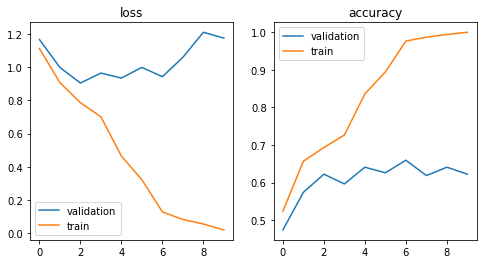

In [28]:
l = loader()
l.batch_size = 30
l.getAllDataSubject(num_test = 50,num_validation = 30)
train_loader = l.train_loader
test_loader = l.test_loader
val_loader = l.val_loader
print('-'*20)
for batch_idx, (data, target) in enumerate(train_loader):
    print('data size:',data.shape)
    # check nan in data
    print("The nan still exist:",np.isnan(data.numpy().sum()))
    break
model = CNN_V3()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 10)
for i in range(9):
    print('This is test set result for subject{}:'.format(i+1))
    test(l.test_loaders[i], mode = 'val')